In [137]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [138]:
%cd /content/drive/MyDrive/dmg_A2/

/content/drive/MyDrive/dmg_A2


In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
import joblib
# from Apriori import apriori


In [140]:
movie_df = pd.read_csv("movies.csv",header=None)
rating_df = pd.read_csv("ratings.csv",header=None)
links_df = pd.read_csv("links.csv",header = None)
tags_df = pd.read_csv("tags.csv",header=None)
movie_df=movie_df.drop(0)
movie_df

,0,1,2
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,2,Jumanji (1995),Adventure|Children|Fantasy
3,3,Grumpier Old Men (1995),Comedy|Romance
4,4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9738,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9739,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9740,193585,Flint (2017),Drama
9741,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [141]:
rating_df.isnull().sum()



0    0
1    0
2    0
3    0
dtype: int64

In [142]:
tags_df.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [143]:
links_df.isnull().sum()

0    0
1    0
2    8
dtype: int64

In [144]:
movie_df.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [145]:
rating_df

,0,1,2,3
0,userId,movieId,rating,timestamp
1,1,1,4.0,964982703
2,1,3,4.0,964981247
3,1,6,4.0,964982224
4,1,47,5.0,964983815
...,...,...,...,...
100832,610,166534,4.0,1493848402
100833,610,168248,5.0,1493850091
100834,610,168250,5.0,1494273047
100835,610,168252,5.0,1493846352


In [146]:
tags_df

,0,1,2,3
0,userId,movieId,tag,timestamp
1,2,60756,funny,1445714994
2,2,60756,Highly quotable,1445714996
3,2,60756,will ferrell,1445714992
4,2,89774,Boxing story,1445715207
...,...,...,...,...
3679,606,7382,for katie,1171234019
3680,606,7936,austere,1173392334
3681,610,3265,gun fu,1493843984
3682,610,3265,heroic bloodshed,1493843978


In [147]:
links_df

,0,1,2
0,movieId,imdbId,tmdbId
1,1,0114709,862
2,2,0113497,8844
3,3,0113228,15602
4,4,0114885,31357
...,...,...,...
9738,193581,5476944,432131
9739,193583,5914996,445030
9740,193585,6397426,479308
9741,193587,8391976,483455


In [148]:
movie_df.describe()

,0,1,2
count,9742,9742,9742
unique,9742,9737,951
top,66665,Eros (2004),Drama
freq,1,2,1053


In [149]:
rating_df.describe()

,0,1,2,3
count,100837,100837,100837,100837
unique,611,9725,11,85044
top,414,356,4.0,1459787998
freq,2698,329,26818,128


In [150]:
tags_df.describe()

,0,1,2,3
count,3684,3684,3684,3684
unique,59,1573,1590,3412
top,474,296,In Netflix queue,1137271192
freq,1507,181,131,5


In [151]:
links_df.describe()

,0,1,2
count,9743,9743,9735
unique,9743,9743,9734
top,66665,0096320,4912
freq,1,1,2


In [152]:
movie_matrix=movie_df.to_numpy()
movie_matrix
movies=[]
for i in range (len(movie_matrix)):
  string=movie_matrix[i][2]
  lt=string.split('|')
  for m in lt:
    movies.append(m)
movies=set(movies)
movies=sorted(movies)
print(movies)

['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [153]:
data=np.random.randint(1,size=(9743,20))
df_add=pd.DataFrame(data=data,columns=movies)
new_movie_df=pd.concat([movie_df,df_add],axis=1)
new_movie_df=new_movie_df.drop(0)
new_movie_df=new_movie_df.drop(2,axis=1)
new_movie_df


,0,1,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,1,Toy Story (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,Jumanji (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,Grumpier Old Men (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,Waiting to Exhale (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,5,Father of the Bride Part II (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9738,193581,Black Butler: Book of the Atlantic (2017),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9739,193583,No Game No Life: Zero (2017),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9740,193585,Flint (2017),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9741,193587,Bungo Stray Dogs: Dead Apple (2018),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [154]:
for i in range (9742):
  string=movie_matrix[i][2]
  lt=string.split('|')
  # print(lt)
  for m in lt:
    new_movie_df.at[i+1,m]=1

In [155]:
new_movie_df

,0,1,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9738,193581,Black Butler: Book of the Atlantic (2017),0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,193583,No Game No Life: Zero (2017),0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9740,193585,Flint (2017),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9741,193587,Bungo Stray Dogs: Dead Apple (2018),0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [156]:
new_movie_df.rename({0: 'Movie_Id', 1: 'Title'}, axis=1)

,Movie_Id,Title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9738,193581,Black Butler: Book of the Atlantic (2017),0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,193583,No Game No Life: Zero (2017),0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9740,193585,Flint (2017),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9741,193587,Bungo Stray Dogs: Dead Apple (2018),0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [157]:
count_genere = new_movie_df.iloc[:,2:].sum(axis=0,skipna=True)
genre_count_lst = count_genere[:].tolist()
print(count_genere)
# genre_count_lst

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64


In [158]:
frequency_tag_df = tags_df.iloc[:,1:].groupby(2).count()
frequency_tag_df

,1,3
2,,
"""artsy""",1,1
06 Oscar Nominated Best Movie - Animation,3,3
1900s,1,1
1920s,2,2
1950s,2,2
...,...,...
wry,1,1
younger men,1,1
zither,1,1


# **Common Genres**

Text(0.5, 0, 'Count')

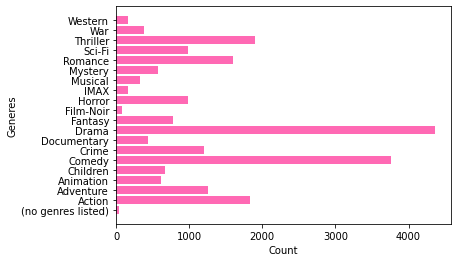

In [159]:
plt.barh(movies,count_genere,color='hotpink')
plt.ylabel('Generes')
plt.xlabel('Count')

In [160]:
no_of_ratings = rating_df.iloc[1:,2].value_counts()
ratings_lst = no_of_ratings[:].tolist()
ratings=[4.0,3.0,5.0,3.5,4.5,2.0,2.5,1.0,1.5,0.5]


# **How much rating most people give?**

Text(0.5, 0, 'Ratings')

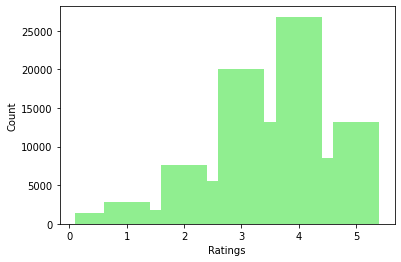

In [161]:
plt.bar(ratings,ratings_lst,color='lightgreen')
plt.ylabel('Count')
plt.xlabel('Ratings')

# **Top five Most rated movies**

In [162]:
top_five=rating_df.groupby(1).size().sort_values(ascending=False)[:5]
top_five

1
356     329
318     317
296     307
593     279
2571    278
dtype: int64

In [163]:
top_five_movies=[]
top_five_movie_count=list(top_five)
for i in top_five.keys():
  movie_title=new_movie_df[new_movie_df[0]==i]
  top_five_movies.append(movie_title.values[0][1])


Text(0.5, 0, 'rating count')

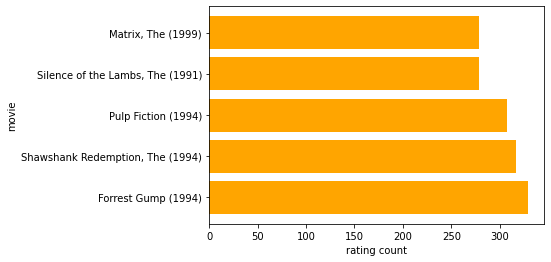

In [164]:
plt.barh(top_five_movies,top_five_movie_count,color='orange')
plt.ylabel('movie')
plt.xlabel('rating count')

# **QUES 2**🕺

In [165]:
merged_df = pd.merge(rating_df, new_movie_df[[0, 1]], left_on=1, right_on=0)


In [166]:
merged_df['0_x']

0           1
1           5
2           7
3          15
4          17
         ... 
100831    610
100832    610
100833    610
100834    610
100835    610
Name: 0_x, Length: 100836, dtype: object

In [167]:
merged_df.drop(['1_x','0_y',3],axis=1,inplace=True)

In [168]:
print(merged_df)
merged_df = merged_df.rename({1: 'Movie_Id', '0_x': 'User_Id','1_y':'Title',2:'Rating'}, axis=1)

             1  0_x    2                               1_y
0            1    1  4.0                  Toy Story (1995)
1            1    5  4.0                  Toy Story (1995)
2            1    7  4.5                  Toy Story (1995)
3            1   15  2.5                  Toy Story (1995)
4            1   17  4.5                  Toy Story (1995)
...        ...  ...  ...                               ...
100831  160341  610  2.5                  Bloodmoon (1997)
100832  160527  610  4.5  Sympathy for the Underdog (1971)
100833  160836  610  3.0                     Hazard (2005)
100834  163937  610  3.5                Blair Witch (2016)
100835  163981  610  3.5                         31 (2016)

[100836 rows x 4 columns]


In [169]:
merged_df

,Movie_Id,User_Id,Rating,Title
0,1,1,4.0,Toy Story (1995)
1,1,5,4.0,Toy Story (1995)
2,1,7,4.5,Toy Story (1995)
3,1,15,2.5,Toy Story (1995)
4,1,17,4.5,Toy Story (1995)
...,...,...,...,...
100831,160341,610,2.5,Bloodmoon (1997)
100832,160527,610,4.5,Sympathy for the Underdog (1971)
100833,160836,610,3.0,Hazard (2005)
100834,163937,610,3.5,Blair Witch (2016)


In [170]:
merged_df = merged_df.drop_duplicates(['User_Id','Title'])

In [171]:
merged_df

,Movie_Id,User_Id,Rating,Title
0,1,1,4.0,Toy Story (1995)
1,1,5,4.0,Toy Story (1995)
2,1,7,4.5,Toy Story (1995)
3,1,15,2.5,Toy Story (1995)
4,1,17,4.5,Toy Story (1995)
...,...,...,...,...
100831,160341,610,2.5,Bloodmoon (1997)
100832,160527,610,4.5,Sympathy for the Underdog (1971)
100833,160836,610,3.0,Hazard (2005)
100834,163937,610,3.5,Blair Witch (2016)


In [172]:
merged_df_pivot = merged_df.pivot(index='User_Id', columns='Title', values='Rating').fillna(0)
merged_df_pivot = merged_df_pivot.astype('float64')

In [173]:
merged_df_pivot

Title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Streets (2016),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09""01 - September 11 (2002)",11:14 (2003),"11th Hour, The (2007)",12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Rounds (2009),12 Years a Slave (2013),...,Zathura (2005),Zatoichi and the Chest of Gold (Zatôichi senryô-kubi) (Zatôichi 6) (1964),Zazie dans le métro (1960),Zebraman (2004),"Zed & Two Noughts, A (1985)",Zeitgeist: Addendum (2008),Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Zipper (2015),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Strippers! (2008),Zombieland (2009),Zone 39 (1997),"Zone, The (La Zona) (2007)",Zookeeper (2011),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoom (2015),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
User_Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [174]:


for j in merged_df_pivot.columns:
  
  merged_df_pivot.loc[merged_df_pivot[j] >= 1, j] = 1
  merged_df_pivot.loc[merged_df_pivot[j] < 1, j] = 0


  


In [175]:
merged_df_pivot = merged_df_pivot.astype('int64')
merged_df_pivot

Title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Streets (2016),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09""01 - September 11 (2002)",11:14 (2003),"11th Hour, The (2007)",12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Rounds (2009),12 Years a Slave (2013),...,Zathura (2005),Zatoichi and the Chest of Gold (Zatôichi senryô-kubi) (Zatôichi 6) (1964),Zazie dans le métro (1960),Zebraman (2004),"Zed & Two Noughts, A (1985)",Zeitgeist: Addendum (2008),Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Zipper (2015),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Strippers! (2008),Zombieland (2009),Zone 39 (1997),"Zone, The (La Zona) (2007)",Zookeeper (2011),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoom (2015),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
User_Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Train Model**⛽


In [176]:
f_set = apriori(merged_df_pivot, min_support=0.1, use_colnames=True)
f_set

,support,itemsets
0,0.178689,(2001: A Space Odyssey (1968))
1,0.129508,(300 (2007))
2,0.119672,"(40-Year-Old Virgin, The (2005))"
3,0.260656,(Ace Ventura: Pet Detective (1994))
4,0.144262,(Ace Ventura: When Nature Calls (1995))
...,...,...
108776,0.100000,(Star Wars: Episode VI - Return of the Jedi (1...
108777,0.101639,(Star Wars: Episode VI - Return of the Jedi (1...
108778,0.101639,(Star Wars: Episode VI - Return of the Jedi (1...
108779,0.100000,(Star Wars: Episode VI - Return of the Jedi (1...


In [177]:
ass_rule = association_rules(f_set, min_threshold=1, metric="lift")

In [206]:
 
# Save  as a picklefile
joblib.dump(ass_rule, 'model.pkl')
ass_rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2001: A Space Odyssey (1968)),(Alien (1979)),0.178689,0.237705,0.122951,0.688073,2.894654,0.080476,2.443828
1,(Alien (1979)),(2001: A Space Odyssey (1968)),0.237705,0.178689,0.122951,0.517241,2.894654,0.080476,1.701288
2,(2001: A Space Odyssey (1968)),(Aliens (1986)),0.178689,0.206557,0.116393,0.651376,3.153488,0.079484,2.275928
3,(Aliens (1986)),(2001: A Space Odyssey (1968)),0.206557,0.178689,0.116393,0.563492,3.153488,0.079484,1.881550
4,(2001: A Space Odyssey (1968)),(American Beauty (1999)),0.178689,0.332787,0.114754,0.642202,1.929769,0.055289,1.864775
...,...,...,...,...,...,...,...,...,...
2985987,(Lord of the Rings: The Fellowship of the Ring...,(Star Wars: Episode VI - Return of the Jedi (1...,0.321311,0.104918,0.101639,0.316327,3.014987,0.067928,1.309224
2985988,(Pulp Fiction (1994)),(Star Wars: Episode VI - Return of the Jedi (1...,0.500000,0.109836,0.101639,0.203279,1.850746,0.046721,1.117284
2985989,"(Lord of the Rings: The Two Towers, The (2002))",(Star Wars: Episode VI - Return of the Jedi (1...,0.306557,0.103279,0.101639,0.331551,3.210254,0.069979,1.341495
2985990,(Star Wars: Episode IV - A New Hope (1977)),(Star Wars: Episode VI - Return of the Jedi (1...,0.409836,0.103279,0.101639,0.248000,2.401270,0.059312,1.192449


In [179]:
movies_sorted_recommendation=ass_rule.sort_values(by=['lift'],ascending=False)

In [180]:
movies_sorted_recommendation

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1907656,(Star Wars: Episode VI - Return of the Jedi (1...,"(Kill Bill: Vol. 2 (2004), Star Wars: Episode ...",0.106557,0.111475,0.100000,0.938462,8.418552,0.088121,14.438525
1907657,"(Kill Bill: Vol. 2 (2004), Star Wars: Episode ...",(Star Wars: Episode VI - Return of the Jedi (1...,0.111475,0.106557,0.100000,0.897059,8.418552,0.088121,8.679157
1907641,(Star Wars: Episode VI - Return of the Jedi (1...,"(Kill Bill: Vol. 2 (2004), Star Wars: Episode ...",0.106557,0.114754,0.100000,0.938462,8.178022,0.087772,14.385246
1051326,(Star Wars: Episode VI - Return of the Jedi (1...,"(Kill Bill: Vol. 2 (2004), Star Wars: Episode ...",0.106557,0.114754,0.100000,0.938462,8.178022,0.087772,14.385246
1051335,"(Kill Bill: Vol. 2 (2004), Star Wars: Episode ...",(Star Wars: Episode VI - Return of the Jedi (1...,0.114754,0.106557,0.100000,0.871429,8.178022,0.087772,6.948998
...,...,...,...,...,...,...,...,...,...
38259,"(Matrix, The (1999))","(Pulp Fiction (1994), Batman (1989))",0.447541,0.245902,0.111475,0.249084,1.012943,0.001424,1.004238
2190,"(Matrix, The (1999))",(Beauty and the Beast (1991)),0.447541,0.239344,0.108197,0.241758,1.010086,0.001080,1.003184
2191,(Beauty and the Beast (1991)),"(Matrix, The (1999))",0.239344,0.447541,0.108197,0.452055,1.010086,0.001080,1.008238
4467,(Fight Club (1999)),"(Fugitive, The (1993))",0.352459,0.309836,0.109836,0.311628,1.005783,0.000632,1.002603


# **Top Recommended Movies**🎥


In [196]:
test_df = pd.read_csv("test.csv",header=None)
test_df=test_df.drop(0)
temp_lisss = (test_df.values)
final_liss = []
not_final_temp = []
for i in range(len(temp_lisss)):
  
  not_final_temp.append(temp_lisss[i][0].split("\n"))
  # final_liss.append(not_final_temp)

not_final_temp

[['Toy Story (1995)'],
 ['Godfather, The (1972)'],
 ['Godfather, The (1972)', 'Fargo (1996)', ''],
 ['Searching for Bobby Fischer (1993)'],
 ['American Pie (1999)', 'Big Daddy (1999)', '']]

In [197]:
def model_predict(temp_lisss):
  df_choice = movies_sorted_recommendation[movies_sorted_recommendation['antecedents'].apply(lambda x:len(x)==len(temp_lisss) and next(iter(x)) in temp_lisss)]
  top_list=df_choice.iloc[:,1].values
  
  top_recommendation=[]
  recommendation_count=4
  for i in top_list:
    for j in i:
      if recommendation_count>0 and j not in top_recommendation :
        top_recommendation.append(j)
        recommendation_count-=1

  # print(top_recommendation)
  for i in top_five.keys():
    
    if(len(top_recommendation)<4):
      movie_title=new_movie_df[new_movie_df[0]==i]
      # print(movie_title.values[0][1])
      top_recommendation.append(movie_title.values[0][1])
  return top_recommendation

In [198]:
final_ans = []

for i in not_final_temp:
    final_ans.append(model_predict(i))


In [201]:
# df_choice
print(final_ans)
test_df['recommendation']=final_ans
test_df.rename(columns = {0:'movies'}, inplace = True)
pd.DataFrame(test_df).to_csv('recommendation_list.csv',index=None)

[['Indiana Jones and the Last Crusade (1989)', 'Pulp Fiction (1994)', 'Back to the Future (1985)', 'Jurassic Park (1993)'], ["Schindler's List (1993)", 'Shawshank Redemption, The (1994)', 'Godfather: Part II, The (1974)', 'Star Wars: Episode IV - A New Hope (1977)'], ['Star Wars: Episode VI - Return of the Jedi (1983)', 'Pulp Fiction (1994)', 'Godfather: Part II, The (1974)', 'Indiana Jones and the Last Crusade (1989)'], ['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)', 'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)'], ['Star Wars: Episode VI - Return of the Jedi (1983)', 'Star Wars: Episode IV - A New Hope (1977)', 'Forrest Gump (1994)', 'Shawshank Redemption, The (1994)']]


In [209]:
index=1
for i in final_ans:
  print( str(index) +". "+str(i))
  index=index+1


1. ['Indiana Jones and the Last Crusade (1989)', 'Pulp Fiction (1994)', 'Back to the Future (1985)', 'Jurassic Park (1993)']
2. ["Schindler's List (1993)", 'Shawshank Redemption, The (1994)', 'Godfather: Part II, The (1974)', 'Star Wars: Episode IV - A New Hope (1977)']
3. ['Star Wars: Episode VI - Return of the Jedi (1983)', 'Pulp Fiction (1994)', 'Godfather: Part II, The (1974)', 'Indiana Jones and the Last Crusade (1989)']
4. ['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)', 'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)']
5. ['Star Wars: Episode VI - Return of the Jedi (1983)', 'Star Wars: Episode IV - A New Hope (1977)', 'Forrest Gump (1994)', 'Shawshank Redemption, The (1994)']
